In [1]:
#import packages here
import numpy as np
import pandas as pd
import time

N_STATES = 6   # the width of 1-dim world
ACTIONS = ['left', 'right']     # the available actions to use
EPSILON = 0.9   # the degree of greedy (0＜ε＜1)
ALPHA = 0.1     # learning rate (0＜α≤1)
GAMMA = 0.9    # discount factor (0＜γ＜1)
MAX_EPOCHES = 13   # the max epoches
FRESH_TIME = 0.3    # the interval time

In [2]:
#define the function here
def build_q_table(n_states, actions):
    return pd.DataFrame(
        data=0.0,
        index=range(n_states),
        columns=actions
    )

q_table = build_q_table(N_STATES, ACTIONS)
print(q_table)

   left  right
0   0.0    0.0
1   0.0    0.0
2   0.0    0.0
3   0.0    0.0
4   0.0    0.0
5   0.0    0.0


In [3]:
#define the function here
# Given state and Q-table, choose action
def choose_action(state, q_table):
#       # pick all actions from this state
    if np.random.uniform() < EPSILON and q_table.loc[state, :].sum() != 0:
        # Greedy: choose the action with the highest Q-value
        action_name = q_table.loc[state, :].idxmax()
    else:
        # Non-greedy: choose a random action
        action_name = np.random.choice(ACTIONS)

    return action_name

sample_action = choose_action(0, q_table)
print(sample_action)

left


In [4]:
#define the function here
def get_env_feedback(S_current, A):
    # This is how agent will interact with the environment
    if A == 'right':    # move right
        if S_current == N_STATES - 2:  # At the second-to-last state, moving right reaches the treasure
            S_next = 'terminal'
            R = 1  # Reached the treasure
        else:
            S_next = S_current + 1
            R = 0  # No reward until the treasure is reached
    elif A == 'left':  # Move left
        if S_current == 0:  # At the leftmost position, cannot move further left
            S_next = S_current  # Stay at the same state
            R = 0  # No reward for staying in place
        else:
            S_next = S_current - 1
            R = 0  # No reward for moving left until the treasure is reached

    return S_next, R

sample_action = 'left'
S_current = 4
sample_feedback = get_env_feedback(S_current, sample_action)
print(sample_feedback)

(3, 0)


In [5]:
def update_env(S, episode, step_counter):
#     # This is how environment be updated
     env_list = ['-']*(N_STATES-1) + ['T']   # '---------T' our environment
     if S == 'terminal':
         interaction = '  Episode %s: total_steps = %s' % (episode+1, step_counter)
         print('{}\n'.format(interaction), end='')
         time.sleep(2)
     else:
         env_list[S] = 'o'
         interaction = ''.join(env_list)
         print('\r{}'.format(interaction), end='')
         time.sleep(FRESH_TIME)


In [13]:
#define the function here
def reinforce_learning():
#     # main part of RL loop
#     # build Q-table here
#     ...
#     #start training loop
     for episode in range(MAX_EPOCHES):
         step_counter = 0  #counter for counting steps to reach the treasure
         S_current = 0     #start from S_current
         is_terminated = False   #flag to conrinue or stop the loop
         update_env(S_current, episode, step_counter)   #update environment
         while not is_terminated:
#             ...#choose one action
              action = choose_action(S_current, q_table)
#             ...# take action & get next state and reward
              S_next, R = get_env_feedback(S_current, action)
#             ...#update Q-table
              if S_next != 'terminal':                   #if the explorer doesn't get to the treasure
                 q_target = R + GAMMA * max(q_table.loc[S_next, :])   # if next state is not terminal, how can we estimate the q value (hit: bellman equation)?
              else:
                q_target = R     # if next state is terminal, how can we esimate the q value?
                is_terminated = True    # terminate this episode

              q_table.loc[S_current, action] += ALPHA * (q_target - q_table.loc[S_current, action])  # update Q-table
#             ...  # move to next state
              if S_next == 'terminal':
                is_terminated = True
              S_current = S_next
              update_env(S_current, episode, step_counter+1)
              step_counter += 1
     return q_table

In [14]:
#main function to run
if __name__ == "__main__":
     q_table = reinforce_learning()
     print('\r\nQ-table:\n')
     print(q_table)

----oT  Episode 1: total_steps = 39
----oT  Episode 2: total_steps = 16
----oT  Episode 3: total_steps = 7
----oT  Episode 4: total_steps = 12
----oT  Episode 5: total_steps = 12
----oT  Episode 6: total_steps = 5
----oT  Episode 7: total_steps = 5
----oT  Episode 8: total_steps = 5
----oT  Episode 9: total_steps = 5
----oT  Episode 10: total_steps = 5
----oT  Episode 11: total_steps = 5
----oT  Episode 12: total_steps = 5
----oT  Episode 13: total_steps = 5

Q-table:

       left     right
0  0.000000  0.004450
1  0.000000  0.025279
2  0.000041  0.108699
3  0.000073  0.340790
4  0.000000  0.745813
5  0.000000  0.000000


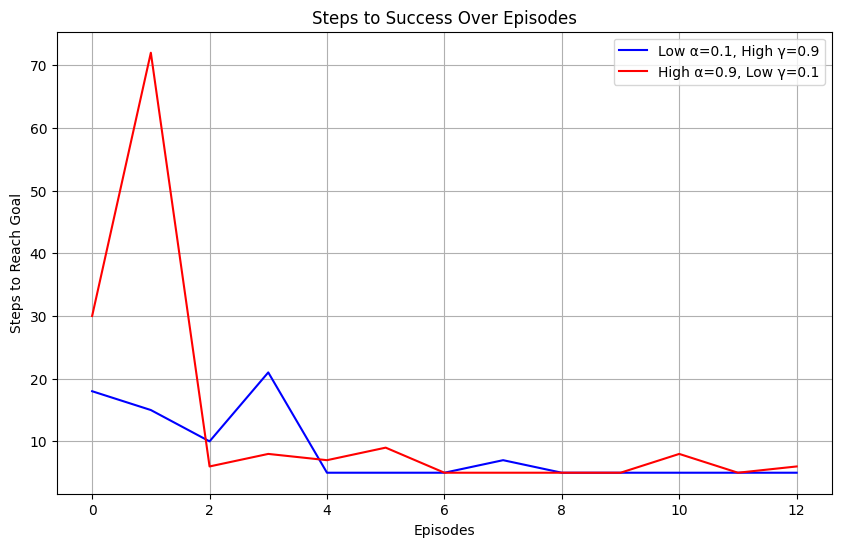

In [17]:
import matplotlib.pyplot as plt

def track_steps(alpha, gamma, episodes=MAX_EPOCHES):
    global ALPHA, GAMMA
    ALPHA, GAMMA = alpha, gamma
    q_table = build_q_table(N_STATES, ACTIONS)
    steps_per_episode = []

    for episode in range(episodes):
        step_counter = 0
        S_current = 0
        is_terminated = False

        while not is_terminated:
            action = choose_action(S_current, q_table)
            S_next, R = get_env_feedback(S_current, action)

            if S_next != 'terminal':
                q_target = R + gamma * max(q_table.loc[S_next, :])
            else:
                q_target = R
                is_terminated = True

            q_table.loc[S_current, action] += alpha * (q_target - q_table.loc[S_current, action])
            S_current = S_next
            step_counter += 1

        steps_per_episode.append(step_counter)

    return steps_per_episode

# Run experiments
steps_low_lr_high_gamma = track_steps(alpha=0.1, gamma=0.9)
steps_high_lr_low_gamma = track_steps(alpha=0.9, gamma=0.1)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(steps_low_lr_high_gamma, label='Low α=0.1, High γ=0.9', color='blue')
plt.plot(steps_high_lr_low_gamma, label='High α=0.9, Low γ=0.1', color='red')
plt.xlabel("Episodes")
plt.ylabel("Steps to Reach Goal")
plt.title("Steps to Success Over Episodes")
plt.legend()
plt.grid()
plt.show()

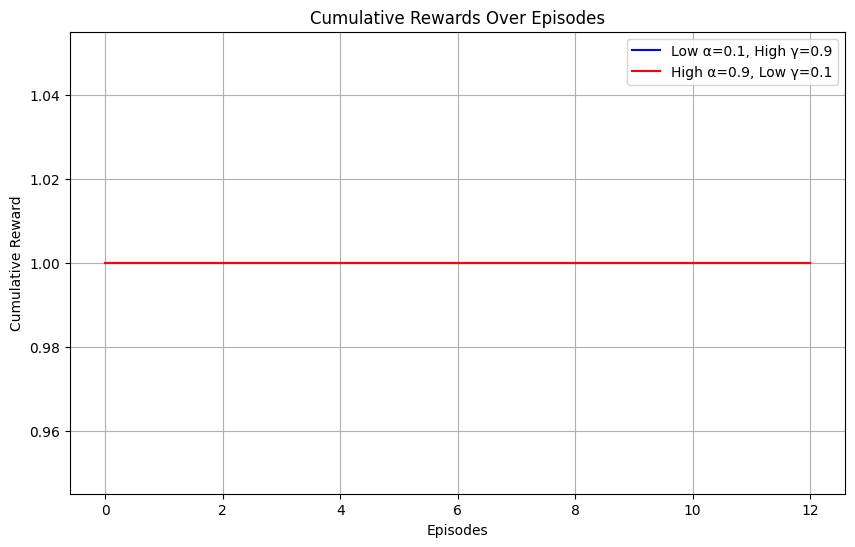

In [19]:
def track_rewards(alpha, gamma, episodes=MAX_EPOCHES):
    global ALPHA, GAMMA
    ALPHA, GAMMA = alpha, gamma
    q_table = build_q_table(N_STATES, ACTIONS)
    cumulative_rewards = []

    for episode in range(episodes):
        total_reward = 0
        S_current = 0
        is_terminated = False

        while not is_terminated:
            action = choose_action(S_current, q_table)
            S_next, R = get_env_feedback(S_current, action)

            if S_next != 'terminal':
                q_target = R + gamma * max(q_table.loc[S_next, :])
            else:
                q_target = R
                is_terminated = True

            q_table.loc[S_current, action] += alpha * (q_target - q_table.loc[S_current, action])
            total_reward += R
            S_current = S_next

        cumulative_rewards.append(total_reward)

    return cumulative_rewards

# Run experiments
rewards_low_lr_high_gamma = track_rewards(alpha=0.1, gamma=0.9)
rewards_high_lr_low_gamma = track_rewards(alpha=0.9, gamma=0.1)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(rewards_low_lr_high_gamma, label='Low α=0.1, High γ=0.9', color='blue')
plt.plot(rewards_high_lr_low_gamma, label='High α=0.9, Low γ=0.1', color='red')
plt.xlabel("Episodes")
plt.ylabel("Cumulative Reward")
plt.title("Cumulative Rewards Over Episodes")
plt.legend()
plt.grid()
plt.show()